In [1]:
import gym
import pandas as pd

from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3.ppo.policies import CnnPolicy
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_util import make_vec_env

# CarRacing
"Easiest continuous control task to learn from pixels, a top-down racing environment. Discreet control is reasonable in this environment as well, on/off discretisation is fine. State consists of 96x96 pixels. Reward is -0.1 every frame and +1000/N for every track tile visited, where N is the total number of tiles in track. For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points. Episode finishes when all tiles are visited. Some indicators shown at the bottom of the window and the state RGB buffer. From left to right: true speed, four ABS sensors, steering wheel position, gyroscope." - [CarRacing-v0](https://gym.openai.com/envs/CarRacing-v0/) ([Source](https://github.com/openai/gym/blob/master/gym/envs/box2d/car_racing.py))

In [9]:
# Create new model
# Try CnnPolicy
env = make_vec_env('CarRacing-v1', n_envs=10)
model = PPO(
    policy=CnnPolicy, 
    env=env, 
    learning_rate=0.0003,
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    clip_range_vf=None,
    ent_coef=0.0,
    vf_coef=0.5,
    max_grad_norm=0.5,
    use_sde=False,
    sde_sample_freq=-1,
    target_kl=None,
    tensorboard_log=None,
    create_eval_env=False,
    policy_kwargs=None,
    verbose=1,
    seed=None,
    device='auto',
    _init_setup_model=True
    )

# Load existing model
# model = PPO.load("./models/carracing-v1/carracing-v1/carracing_v1_ppo_{timesteps}")

Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Train model
timesteps = 500000

log_dir = "./out/training-log/"
log_path = log_dir + f"carracing-v1/"
save_dir = "./models/carracing-v1/"

# Train agent
model.learn(
        total_timesteps=timesteps, 
        callback=None,
        log_interval=-1,
        eval_env=gym.make('CarRacing-v1'), 
        eval_freq=10000/10, 
        n_eval_episodes=5,
        tb_log_name='PPO',
        eval_log_path=log_path, 
        reset_num_timesteps=False
        )

In [1]:
# Display log
import pandas as pd
from utils.utils import load_log

# Load logs and combine into one dataframe
log_dir = "./out/training-log/"
log_path = log_dir + f"carracing-v1/"

files = [
    log_path + "evaluations_to_510K.npz",
]

data = pd.concat([load_log(x) for x in files], axis='index')
data.sort_values(by='timesteps', inplace=True)

data

,mean_rew,mean_ep_length
timesteps,,
10000,-34.163074,1000.0
20000,-35.206066,1000.0
30000,3.971887,1000.0
40000,31.528990,1000.0
50000,30.847347,1000.0
60000,35.776365,1000.0
70000,-18.360504,1000.0
80000,-9.976160,1000.0
90000,10.293743,1000.0


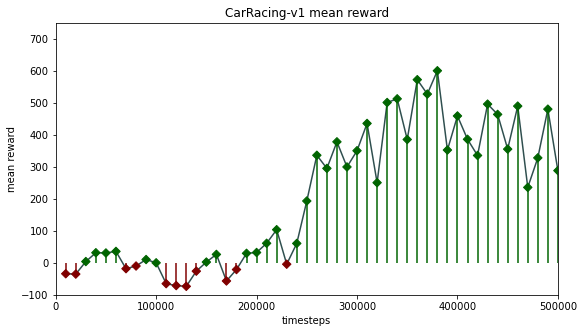

In [2]:
#  Show log as graphic
from utils.utils import plot_log


plot_log(data, title='CarRacing-v1 mean reward')

In [11]:
# Save model
save_dir = "./models/carracing-v1/"
name = "carracing_v1_ppo_510K"
model.save(save_dir + name)